# Analyze soft triggered events

Plots requested by Seckel

### Mar 10, 2021

## Code

In [2]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [3]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

# Soft triggers distribution

In [4]:
Soft2 = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/PowerNoise_softTriggers_run012559_newCalib.pkl")
Soft2.noisePowerDeco.mean()

array([ 242200.31630436, 1015601.09290294, 1224386.22113829,
        503611.00983592,  417826.11248431,  301816.81166007,
        992056.69893234,  602061.71155769, 1533958.19434926,
        786180.34865162,  918586.81578353,  755935.18566052,
       1072358.65934628,  473898.25144686, 1216227.99115952,
       4285738.86701185])

In [5]:
Soft1 = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/PowerNoise_softTriggers_run012559.pkl")
Soft1.noisePowerDeco.mean()

array([ 198873.41455394,  623560.92453918,  742334.59956307,
        274106.2995434 ,  324172.25577991,  209401.82425665,
        641621.72120304,  339869.45278736,  983032.43092843,
        611247.78068897,  714469.67350361,  553980.34036317,
        687012.93355406,  362492.99203386,  834510.96220969,
       2086438.14794425])

In [6]:
Softpower = [[] for i in range(15)]

for i in Soft1.itertuples():
    for ch in range(0,15):
        Softpower[ch].append(i.noisePowerDeco[ch])
        
Softpower2 = [[] for i in range(15)]

for i in Soft2.itertuples():
    for ch in range(0,15):
        Softpower2[ch].append(i.noisePowerDeco[ch])

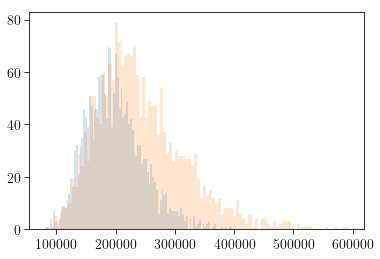

In [70]:
plt.hist(Softpower[0], bins=100, alpha = 0.2);
plt.hist(Softpower2[0], bins=100, alpha = 0.2);

# plt.xlim()

No handles with labels found to put in legend.


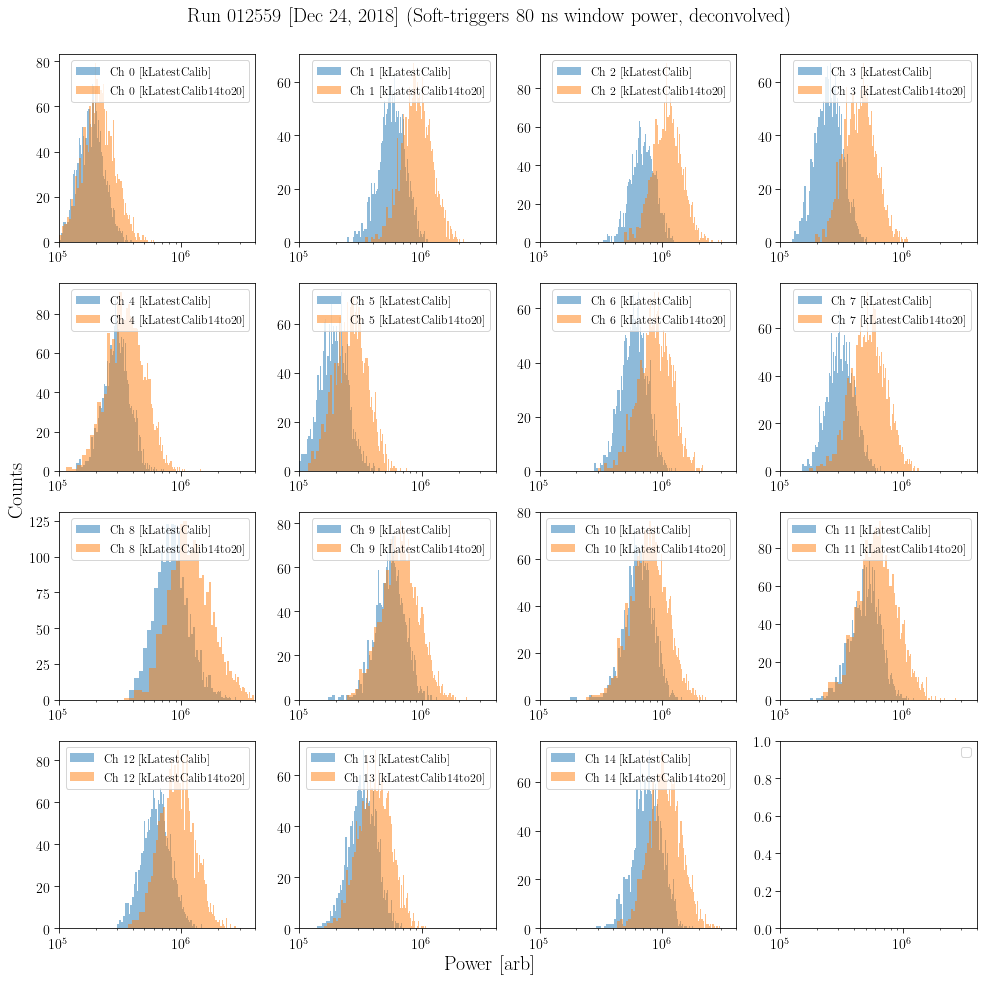

In [72]:
fig, ax = plt.subplots(4, 4, figsize=(14,14))
axs = ax.ravel()
for ch in range(0,15):
    axs[ch].hist(Softpower[ch], label = "Ch %i [kLatestCalib]"%ch, bins = 100, density = False, alpha = 0.5)
    axs[ch].hist(Softpower2[ch], label = "Ch %i [kLatestCalib14to20]"%ch, bins = 100, density = False, alpha = 0.5)


# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Power [arb]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")    
    ax.legend(loc="upper right")
    ax.set_xscale('log')
    ax.set_xlim(1E5,4E6)

plt.suptitle("Run 012559 [Dec 24, 2018] (Soft-triggers 80 ns window power, deconvolved)", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/SoftTrigPowerNoDec_run012559.pdf')


## Spectra

In [80]:
spectra = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/DeconvSpectra_softTriggers_run012559_newCalib.pkl")

spectra2 = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/DeconvSpectra_softTriggers_run012559.pkl")
freqs = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/Spectra_freqs_run012559.pkl")

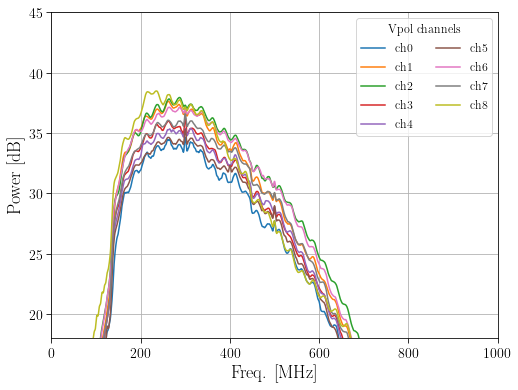

In [75]:
plt.figure(figsize = (8,6))
# for column in spectra.drop(columns="evNum"): 
#     print(spectra[column] )
#     plt.plot(freqs.ch0[0][1:],spectra[column].mean()[1:])
for columnFFT, columnFreq in zip(spectra.drop(columns="evNum"), freqs.drop(columns="evNum")):
    plt.plot(freqs[columnFreq][0][1:],10*np.log10(spectra[columnFFT].mean()[1:]),label = "%s"%columnFFT)
    if columnFFT == "ch8":
        break
# plt.yscale("log")
plt.xlim(0,1000)
# plt.ylim(1E2,3E3)
plt.xlabel("Freq. [MHz]")
plt.ylabel("Power [dB]")
plt.ylim(18,45)

plt.ylabel
plt.grid()
plt.legend(ncol = 2, title = "Vpol channels")

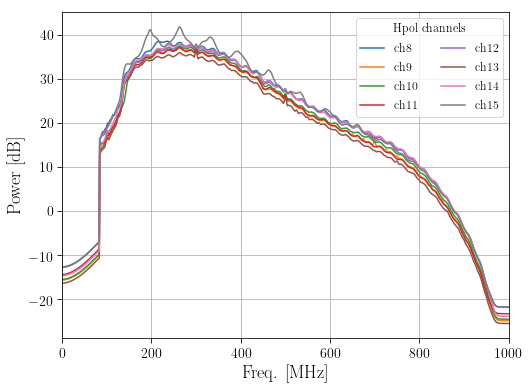

In [76]:
plt.figure(figsize = (8,6))

for columnFFT, columnFreq in zip(spectra.drop(columns=["evNum",'ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7']), freqs.drop(columns=["evNum",'ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7'])):
    plt.plot(freqs[columnFreq][0][1:],10*np.log10(spectra[columnFFT].mean()[1:]),label = "%s"%columnFFT)
#     if columnFFT == "ch8":
#         break
# plt.yscale("log")
plt.xlim(0,1000)
# plt.ylim(1E2,3E3)
plt.xlabel("Freq. [MHz]")
plt.ylabel("Power [dB]")
# plt.ylim(18,32)
plt.grid()
plt.legend(ncol = 2, title = "Hpol channels")

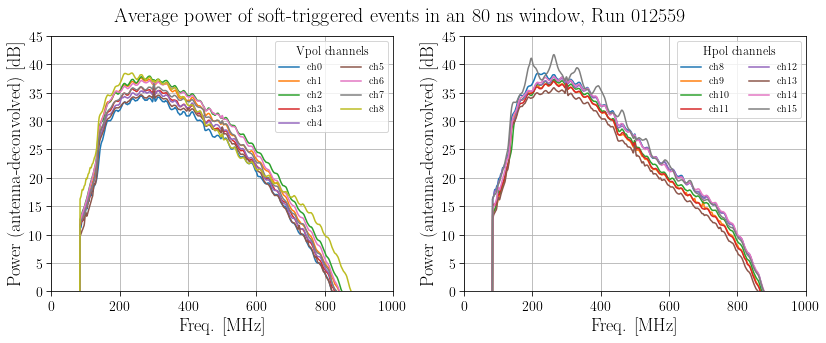

<Figure size 648x432 with 0 Axes>

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
for columnFFT, columnFreq in zip(spectra.drop(columns="evNum"), freqs.drop(columns="evNum")):
    ax[0].plot(freqs[columnFreq][0][1:],10*np.log10(spectra[columnFFT].mean()[1:]),label = "%s"%columnFFT)
    if columnFFT == "ch8":
        break
ax[0].set_xlim(0,1000)
ax[0].set_ylim(0,45)
ax[0].set_xlabel("Freq. [MHz]")
ax[0].set_ylabel("Power (antenna-deconvolved) [dB]")

ax[0].set_ylabel
ax[0].grid()
ax[0].legend(ncol = 2, title = "Vpol channels", fontsize = 10)

plt.figure(figsize = (9,6))

for columnFFT, columnFreq in zip(spectra.drop(columns=["evNum",'ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7']), freqs.drop(columns=["evNum",'ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7'])):
    ax[1].plot(freqs[columnFreq][0][1:],10*np.log10(spectra[columnFFT].mean()[1:]),label = "%s"%columnFFT)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(0,45)
ax[1].set_xlabel("Freq. [MHz]")
ax[1].set_ylabel("Power (antenna-deconvolved) [dB]")

ax[1].set_ylabel
ax[1].grid()
ax[1].legend(ncol = 2, title = "Hpol channels", fontsize = 10)

fig.suptitle("Average power of soft-triggered events in an 80 ns window, Run 012559", fontsize=20)
fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# fig.savefig(my_path_plots+'/SpiceCorePolReco/SoftTrigAvgPow_run012559.pdf')

## Plot by pairs

In [109]:
meanPow = []
for column in spectra.drop(columns=["evNum"]): 
    meanPow.append(spectra[column].mean()[1:])
#     plt.plot(freqs.ch0[0][1:],spectra[column].mean()[1:])

In [1]:
fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=True)
axs = ax.ravel()
for ch in range(0,8):
    axs[ch].plot(freqs.ch0[0][1:],10*np.log10(meanPow[ch]), label = "Ch %i [V]"%ch)
    axs[ch].plot(freqs.ch0[0][1:],10*np.log10(meanPow[ch+8]), label = "Ch %i [H]"%(ch+8))

    
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Frequency [MHz]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'Power (antenna-deconvolved) [dB]', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")    
    ax.legend(loc="upper right")
#     ax.set_yscale('log')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,40)
    ax.grid()
plt.suptitle("Run 012559 [Dec 24, 2018] (Soft-triggers 80 ns window power, antenna response subtracted, after calib. bug fix)", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig(my_path_plots+'/SpiceCorePolReco/DecoSoftTrigAvgPowPairs_run012559_newCalib.pdf')

NameError: name 'plt' is not defined

In [99]:
meanPow2 = []
for column in spectra2.drop(columns=["evNum"]): 
    meanPow2.append(spectra2[column].mean()[1:])

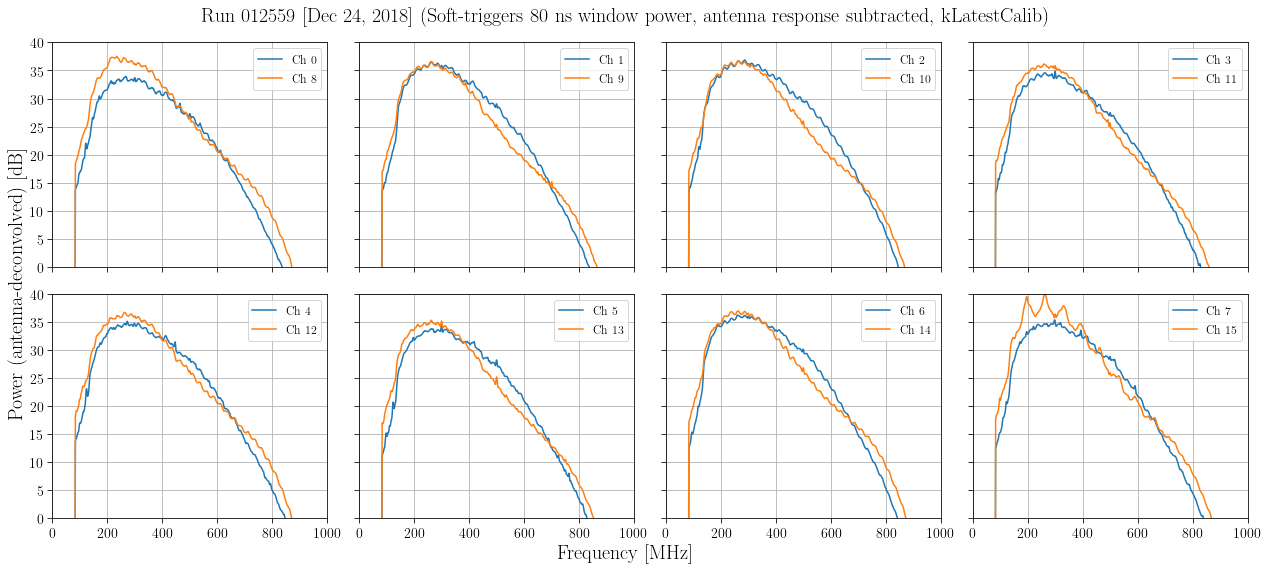

In [112]:
fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=True)
axs = ax.ravel()
for ch in range(0,8):
    axs[ch].plot(freqs.ch0[0][1:],10*np.log10(meanPow2[ch]), label = "Ch %i"%ch)
    axs[ch].plot(freqs.ch0[0][1:],10*np.log10(meanPow2[ch+8]), label = "Ch %i"%(ch+8))

    
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Frequency [MHz]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'Power (antenna-deconvolved) [dB]', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")    
    ax.legend(loc="upper right")
#     ax.set_yscale('log')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,40)
    ax.grid()
plt.suptitle("Run 012559 [Dec 24, 2018] (Soft-triggers 80 ns window power, antenna response subtracted, kLatestCalib)", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig(my_path_plots+'/SpiceCorePolReco/DecoSoftTrigAvgPowPairs_run012559_oldCalib.pdf')

(30, 40)

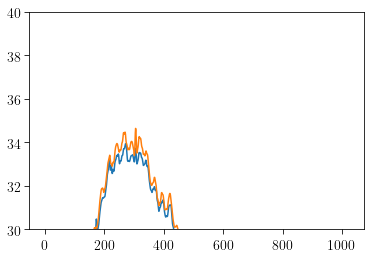

In [107]:
plt.plot(10*np.log10(meanPow2[0]))
plt.plot(10*np.log10(meanPow[0]))
plt.ylim(30,40)
